In [1]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
dataset = pd.read_csv('hw_8/Run200_Wave_0_1.txt', sep=' ', header=None, skipinitialspace=True)
dataset = dataset.drop([0, 1, 2, 3, 504], axis=1)
dataset.columns = list(range(500))
dataset

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,...,14828,14822,14815,14815,14817,14819,14820,14822,14820,14819
1,14820,14822,14820,14826,14824,14822,14820,14822,14823,14821,...,14828,14817,14824,14822,14824,14819,14820,14819,14822,14820
2,14820,14820,14822,14825,14820,14824,14824,14819,14823,14824,...,14820,14821,14820,14820,14818,14821,14823,14820,14820,14821
3,14828,14822,14818,14824,14824,14822,14820,14822,14824,14820,...,14824,14826,14822,14821,14820,14828,14820,14822,14823,14822
4,14823,14815,14823,14821,14827,14820,14823,14824,14816,14821,...,14820,14820,14823,14828,14824,14820,14824,14824,14822,14825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23474,14826,14827,14825,14818,14825,14827,14827,14823,14823,14823,...,14826,14828,14825,14819,14826,14828,14822,14824,14824,14827
23475,14824,14823,14819,14828,14819,14824,14824,14823,14824,14821,...,14828,14826,14824,14814,14814,14818,14816,14822,14819,14817
23476,14822,14822,14824,14820,14823,14828,14823,14824,14820,14824,...,14826,14817,14815,14817,14818,14817,14816,14819,14817,14820
23477,14824,14823,14824,14822,14821,14824,14820,14822,14828,14827,...,14823,14824,14827,14822,14825,14824,14822,14820,14819,14824


In [3]:
print(dataset.shape)

(23479, 500)


Text(0, 0.5, 'bit ADC')

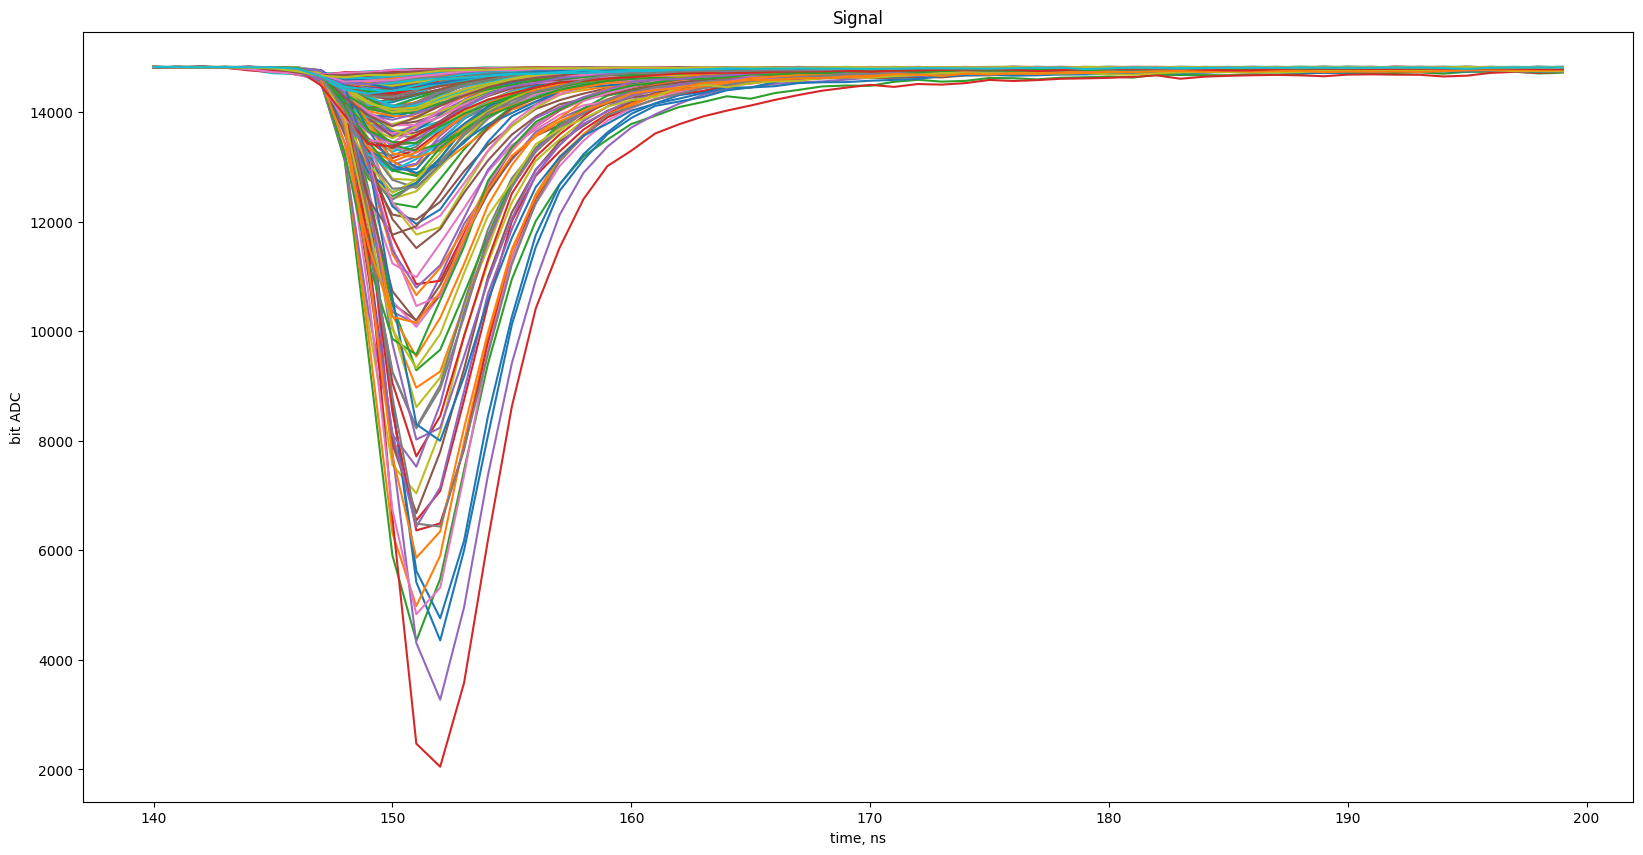

In [4]:
N=range(0,200)
ax = dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")


In [5]:
transformed_dataset = (2**14-dataset-1560)

Text(0, 0.5, 'bit ADC')

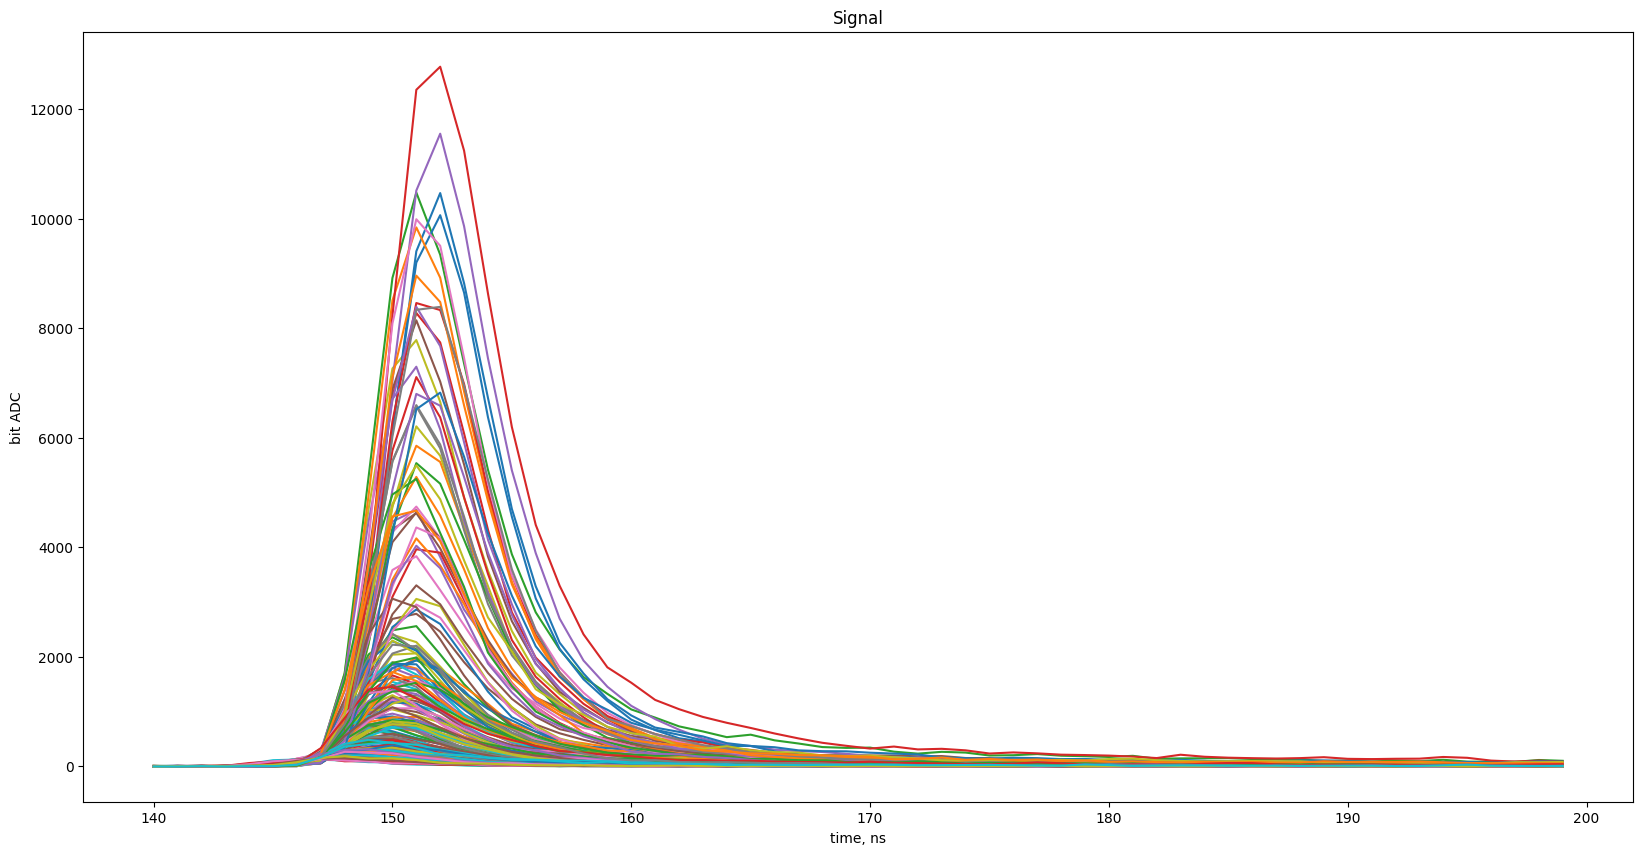

In [6]:
ax = transformed_dataset.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(20,10))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

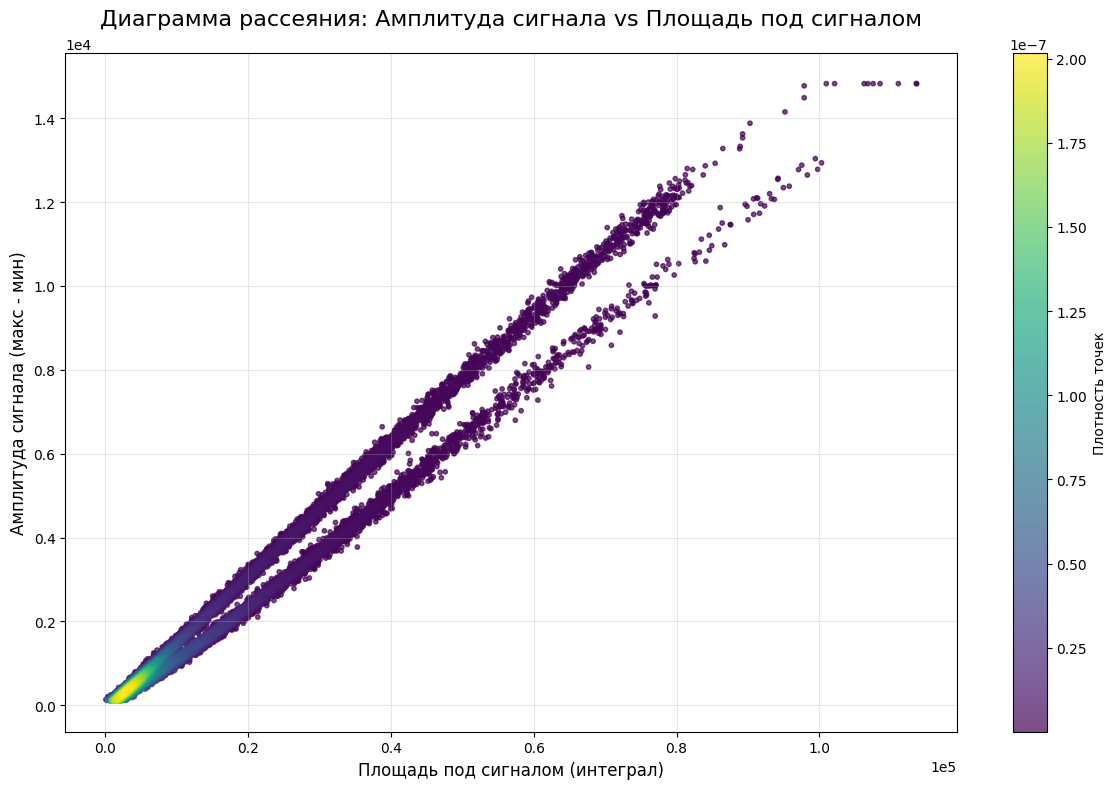

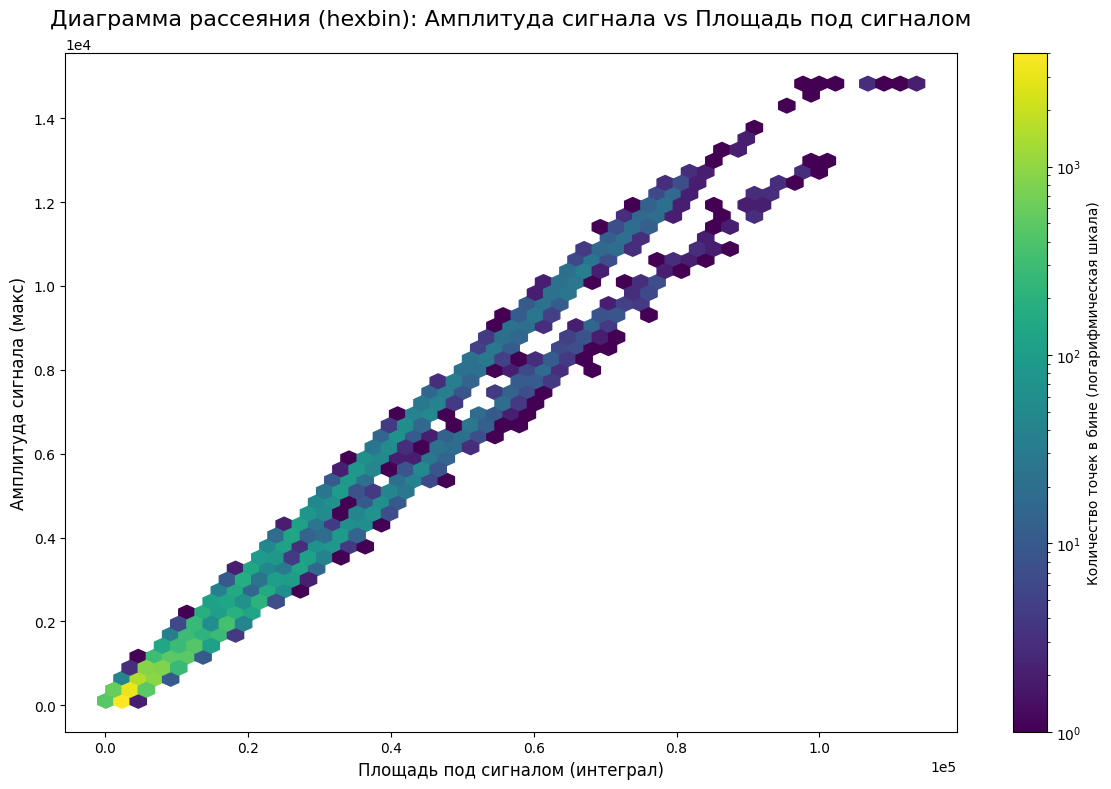

In [ ]:
amplitudes = transformed_dataset.max(axis=1)
areas = transformed_dataset.sum(axis=1)


df = pd.DataFrame({
    'amplitude': amplitudes,
    'area': areas
})

xy = np.vstack([df['area'], df['amplitude']])
z = stats.gaussian_kde(xy)(xy)

# Сортировка по плотности для лучшего отображения точек с высокой плотностью поверх остальных
idx = z.argsort()
df_sorted = df.iloc[idx]
z_sorted = z[idx]

# Построение диаграммы рассеяния с отображением плотности
plt.figure(figsize=(12, 8))

scatter = plt.scatter(df_sorted['area'], df_sorted['amplitude'], 
                      c=z_sorted, s=10, alpha=0.7, cmap='viridis')

cbar = plt.colorbar(scatter, label='Плотность точек')

plt.title('Диаграмма рассеяния: Амплитуда сигнала vs Площадь под сигналом', fontsize=16, pad=20)
plt.xlabel('Площадь под сигналом (интеграл)', fontsize=12)
plt.ylabel('Амплитуда сигнала (макс - мин)', fontsize=12)

plt.grid(True, alpha=0.3)

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))

hb = plt.hexbin(df['area'], df['amplitude'], gridsize=50, cmap='viridis', bins='log')

cbar = plt.colorbar(hb, label='Количество точек в бине (логарифмическая шкала)')

plt.title('Диаграмма рассеяния (hexbin): Амплитуда сигнала vs Площадь под сигналом', 
          fontsize=16, pad=20)
plt.xlabel('Площадь под сигналом (интеграл)', fontsize=12)
plt.ylabel('Амплитуда сигнала (макс)', fontsize=12)

plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

plt.tight_layout()
plt.show()


/tmp/ipykernel_5174/3343024048.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


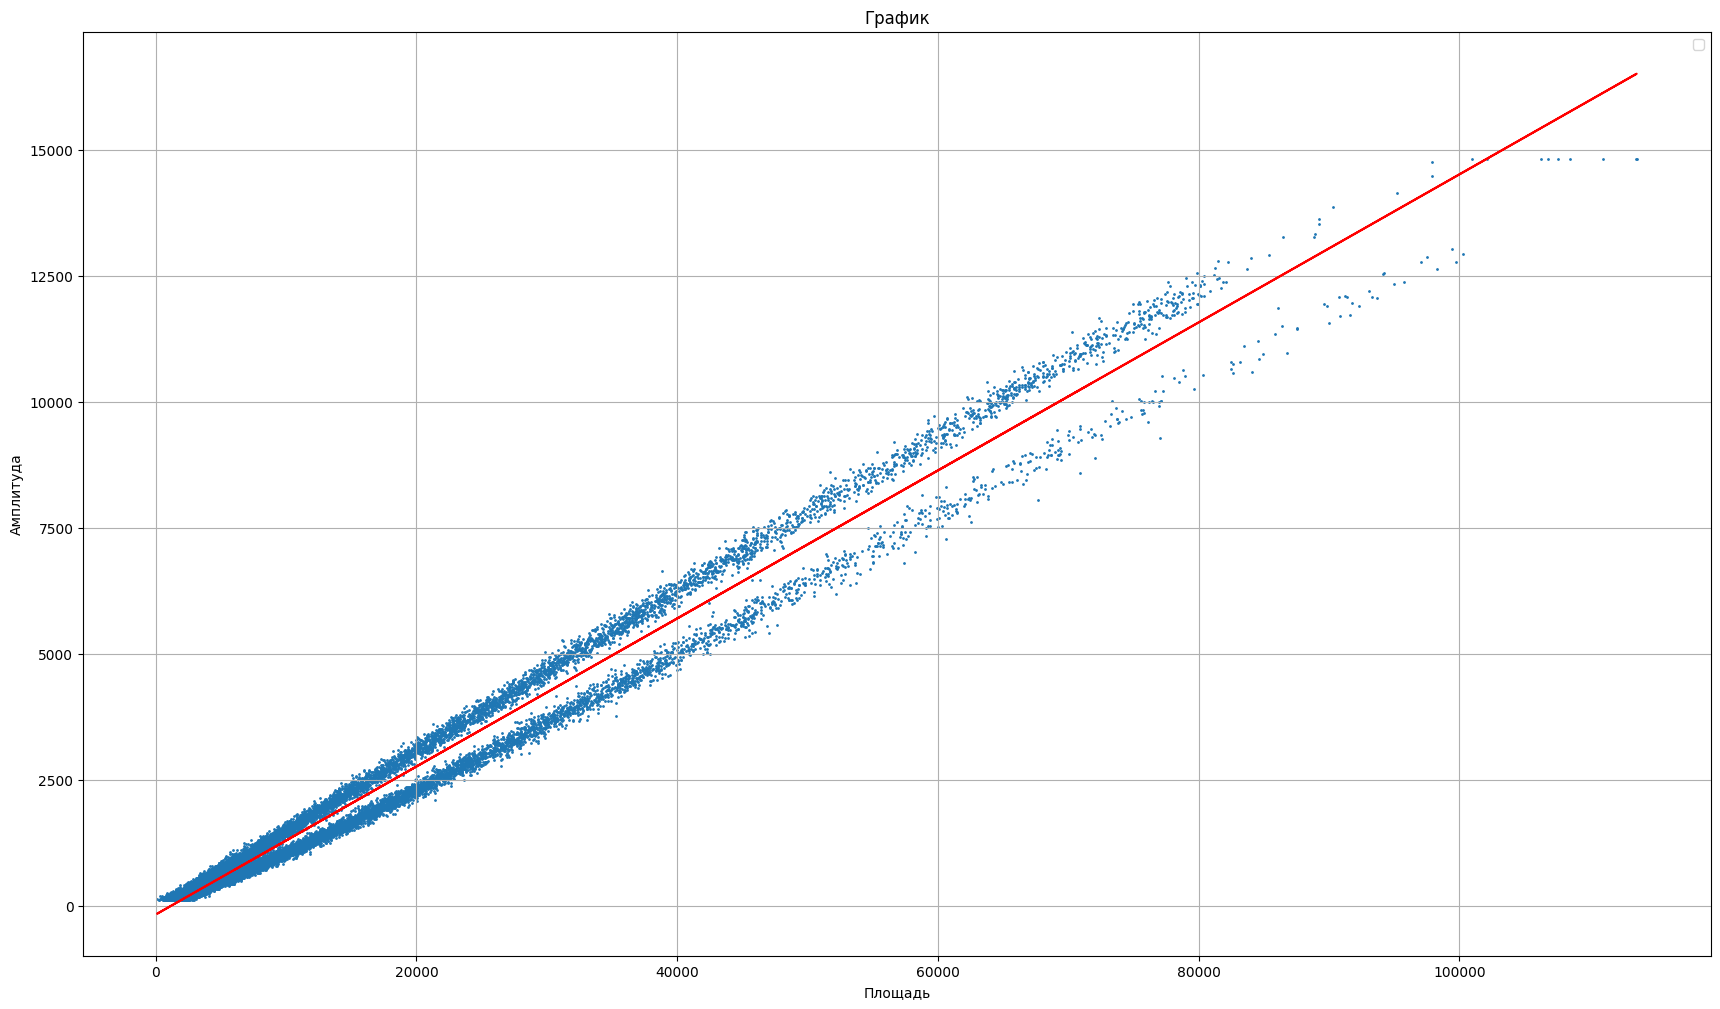

In [8]:
from sklearn.linear_model import LinearRegression
volume = np.array(df['area']).reshape(-1, 1)
ampl = np.array(df['amplitude']).reshape(-1, 1)
model = LinearRegression()
model.fit(volume, ampl)
line = model.predict(volume)

plt.figure(figsize=(21,12))
plt.scatter(volume, ampl, s=1)
plt.plot(volume, line, color='red')
plt.xlabel('Площадь')
plt.ylabel('Амплитуда')
plt.title('График')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'PSD histogram')

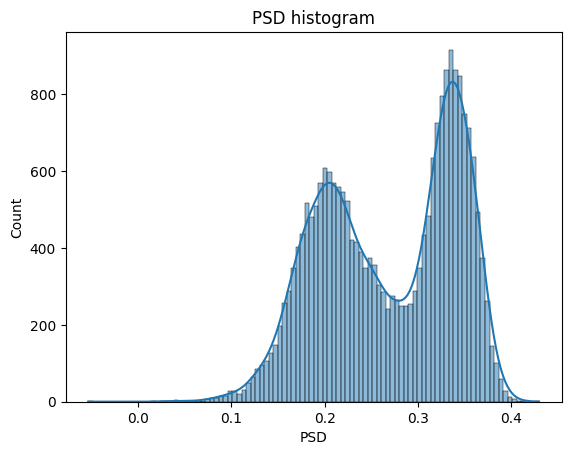

In [14]:
long = transformed_dataset.iloc[:, 140:200].sum(axis=1)
short = transformed_dataset.iloc[:, 140:155].sum(axis=1)
PSDs = (long - short) / long

koeffs = amplitudes / areas

sns.histplot(PSDs, bins=100, kde=True)
plt.xlabel('PSD')
plt.title('PSD histogram')

In [10]:
df_res = pd.DataFrame({
    'PSDs': PSDs,
    'koeffs': koeffs,
})

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_res)


In [11]:
res = DBSCAN(eps=0.1, min_samples=24)
cluster_labels = res.fit_predict(scaled_features)
cluster_labels[cluster_labels == -1] = 2
print(cluster_labels)

print("\nРаспределение по кластерам:")
print(pd.Series(cluster_labels).value_counts().sort_index())

# Оценка качества (силуэтный коэффициент) без учета шума (только кластеры 0 и 1)
mask_valid = cluster_labels < 2
if mask_valid.sum() > 1:
    score = silhouette_score(scaled_features[mask_valid], cluster_labels[mask_valid])
    print(f"Силуэтный коэффициент (без шума): {score:.3f}")


result_df = pd.DataFrame({'index': dataset.index, 'cluster': cluster_labels})
result_df.to_csv('hw_8/clustering_result.csv', index=False)
print("\nРезультаты сохранены в clustering_result.csv")

[0 1 1 ... 0 0 1]

Распределение по кластерам:
0    11332
1    10479
2     1668
Name: count, dtype: int64
Силуэтный коэффициент (без шума): 0.609

Результаты сохранены в clustering_result.csv


/tmp/ipykernel_5174/2440129789.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


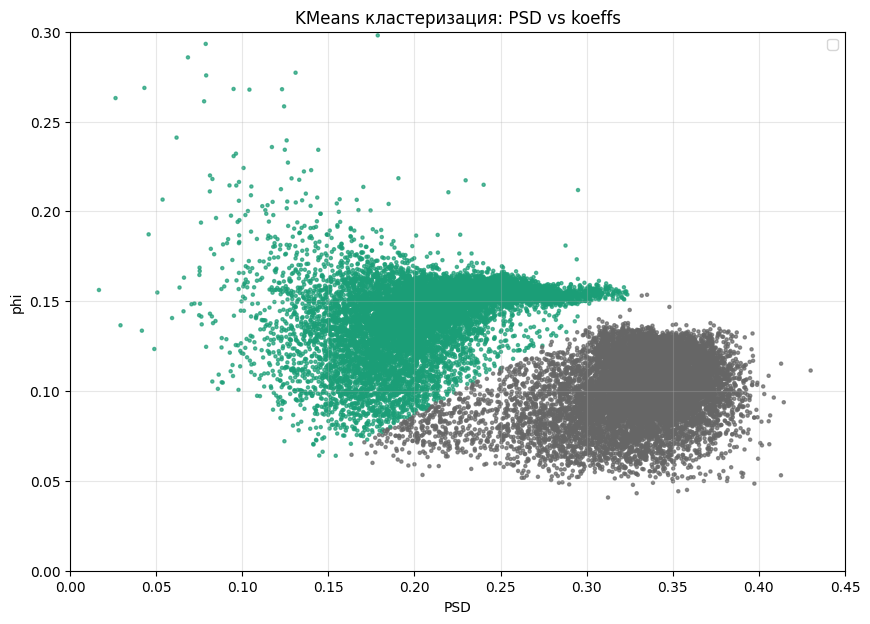

In [12]:
kmeans = KMeans(n_clusters=2, random_state=40, n_init=10)
res = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10,7))
plt.scatter(df_res['PSDs'], df_res['koeffs'], c=res, cmap='Dark2', s=5, alpha=0.7)

plt.xlim([0, 0.45])
plt.ylim([0, 0.3])
plt.xlabel('PSD')
plt.ylabel('phi')
plt.title('KMeans кластеризация: PSD vs koeffs')
plt.legend()
plt.grid(alpha=0.3)
plt.show()